# 환경설정

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats

import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import font_manager,rc
# 한글 폰트
font_location = "C:\Windows\Fonts\malgun.ttf"
font_name = font_manager.FontProperties(fname=font_location).get_name()
rc('font',family=font_name)
plt.rcParams['axes.unicode_minus'] = False  # 유니코드 마이너스 기호 사용

## 주요절차

# 1) 세종특별자치시_여민전_가맹점_현황

### 데이터 수집

* 데이터 소스 명시

In [2]:
#세종특별자치시_여민전_가맹점_현황
# 여민전 : 인천광역시에서 발행하는 지역화폐의 이름입니다.
df= pd.read_csv('세종특별자치시_여민전 가맹점 현황_20250523.csv',encoding='cp949')

In [3]:
df

,연번,가맹점명,업종명,전화번호,읍면동,소재지 도로명주소,위도,경도
0,1,#738,의류/잡화/안경,NaN,보람동,[30150] 세종특별자치시 남세종로 469 408동1304호,36.460810,127.276967
1,2,#언니(샵언니),미용/뷰티/위생,044-864-8890,조치원읍,[30020] 세종특별자치시 조치원읍 문화길 29 4동2호,36.481309,127.289901
2,3,(A+)베이비맘케어,미용/뷰티/위생,042-863-3545,보람동,[30151] 세종특별자치시 시청대로 167 드림빌딩 207호,36.481309,127.289901
3,4,(BodyReading)바디리딩,기타,NaN,나성동,[30128] 세종특별자치시 나성북1로 23 상가동(802동) 229호,36.484596,127.252495
4,5,(KS세종MTB)삼천리자전거 조치원점,자동차/자전거,044-865-9600,조치원읍,[30035] 세종특별자치시 조치원읍 새내2길 42 삼천리자전거,36.496712,127.269133
...,...,...,...,...,...,...,...,...
12822,12823,히트복싱 소담점,학원/교육,NaN,소담동,"[30151] 세종특별자치시 한누리대로 2018 204,205,206호 히트복싱",36.484745,127.299401
12823,12824,아그리엔북스,카페/베이커리,070-7755-4711,연동면,[30066] 세종특별자치시 연동면 예양길 11 1층,36.573663,127.323572
12824,12825,꿀꿀,일반음식점,NaN,대평동,[30152] 세종특별자치시 한누리대로 2236 B124호,36.474221,127.277088
12825,12826,룰루마리김밥,분식,044-865-5493,소담동,[30150] 세종특별자치시 한누리대로 2003 101호,36.485449,127.301113


### 1. 초기데이터 확인

#### 1-1. 데이터딕셔너리(각 열의 의미, 데이터의 의미해석관련 스펙 또는 메뉴얼) 확인

#### 1-2 데이터 기초정보 확인 (사이즈, 열이름, 데이터형)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12827 entries, 0 to 12826
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   연번         12827 non-null  int64  
 1   가맹점명       12826 non-null  object 
 2   업종명        12775 non-null  object 
 3   전화번호       8442 non-null   object 
 4   읍면동        12591 non-null  object 
 5   소재지 도로명주소  12760 non-null  object 
 6   위도         12105 non-null  float64
 7   경도         12105 non-null  float64
dtypes: float64(2), int64(1), object(5)
memory usage: 801.8+ KB


In [5]:
df.columns

Index(['연번', '가맹점명', '업종명', '전화번호', '읍면동', '소재지 도로명주소', '위도', '경도'], dtype='object')

In [6]:
df.shape

(12827, 8)

### 2. 데이터 정제

#### 2.1. 원본데이터에서 분석가능한 형태로 데이터 전처리 (형변환, 열이름 변경등)

* 해당사항 없어 생략

#### 2.2. 데이터 클리닝:  결측치처리, 이상치 처리

##### 2.2.1 결측치

In [7]:
# 위도 경도 결측치 클리닝

In [8]:
df_clean=df.dropna(subset=['위도', '경도','읍면동'])

In [9]:
df_clean

,연번,가맹점명,업종명,전화번호,읍면동,소재지 도로명주소,위도,경도
0,1,#738,의류/잡화/안경,NaN,보람동,[30150] 세종특별자치시 남세종로 469 408동1304호,36.460810,127.276967
1,2,#언니(샵언니),미용/뷰티/위생,044-864-8890,조치원읍,[30020] 세종특별자치시 조치원읍 문화길 29 4동2호,36.481309,127.289901
2,3,(A+)베이비맘케어,미용/뷰티/위생,042-863-3545,보람동,[30151] 세종특별자치시 시청대로 167 드림빌딩 207호,36.481309,127.289901
3,4,(BodyReading)바디리딩,기타,NaN,나성동,[30128] 세종특별자치시 나성북1로 23 상가동(802동) 229호,36.484596,127.252495
4,5,(KS세종MTB)삼천리자전거 조치원점,자동차/자전거,044-865-9600,조치원읍,[30035] 세종특별자치시 조치원읍 새내2길 42 삼천리자전거,36.496712,127.269133
...,...,...,...,...,...,...,...,...
12822,12823,히트복싱 소담점,학원/교육,NaN,소담동,"[30151] 세종특별자치시 한누리대로 2018 204,205,206호 히트복싱",36.484745,127.299401
12823,12824,아그리엔북스,카페/베이커리,070-7755-4711,연동면,[30066] 세종특별자치시 연동면 예양길 11 1층,36.573663,127.323572
12824,12825,꿀꿀,일반음식점,NaN,대평동,[30152] 세종특별자치시 한누리대로 2236 B124호,36.474221,127.277088
12825,12826,룰루마리김밥,분식,044-865-5493,소담동,[30150] 세종특별자치시 한누리대로 2003 101호,36.485449,127.301113


In [10]:
#가맹점명, 소재지 도로명 주소 같은 데이터 확인
df_clean[df_clean.duplicated(subset=['가맹점명','소재지 도로명주소'])]

,연번,가맹점명,업종명,전화번호,읍면동,소재지 도로명주소,위도,경도
311,312,NEW하나로축산,슈퍼/마트,044-866-3933,종촌동,[30064] 세종특별자치시 도움3로 105-5 중앙프라자107호,36.504738,127.249533
354,355,가감 충대정문약국,병원/약국,044-868-2266,도담동,[30098] 세종특별자치시 다솜1로 220 103호 104호,36.518194,127.256906
372,373,가마치통닭,일반음식점,044-866-2238,부강면,[30075] 세종특별자치시 부강면 부촌길 54 가마치통닭,36.530999,127.366255
373,374,가마치통닭,일반음식점,044-866-2238,부강면,[30075] 세종특별자치시 부강면 부촌길 54 가마치통닭,36.530999,127.366255
374,375,가마치통닭,일반음식점,044-866-2238,부강면,[30075] 세종특별자치시 부강면 부촌길 54 가마치통닭,36.530999,127.366255
...,...,...,...,...,...,...,...,...
12587,12588,히트유도관,스포츠/헬스,NaN,소담동,"[30151] 세종특별자치시 한누리대로 2018 2층 207호, 208호 히트유도관",36.484745,127.299401
12661,12662,한우88도매장 도담점,일반음식점,044-905-7070,도담동,"[30098] 세종특별자치시 보듬3로 8-11 101,102,103호",36.513200,127.258238
12743,12744,꺼먹지명태조림 세종본점,일반음식점,044-866-9201,고운동,[30063] 세종특별자치시 마음로 96 1층,36.506621,127.232401
12772,12773,동경한의원,병원/약국,044-865-7573,소담동,[30151] 세종특별자치시 소담3로 8 1층 5호,36.485941,127.300517


In [11]:
# 중복되는 데이터 첫번째 값만 남겨두고 drop
df_clean = df_clean.drop_duplicates(subset=['가맹점명', '소재지 도로명주소'],keep='first')

In [12]:
df_clean

,연번,가맹점명,업종명,전화번호,읍면동,소재지 도로명주소,위도,경도
0,1,#738,의류/잡화/안경,NaN,보람동,[30150] 세종특별자치시 남세종로 469 408동1304호,36.460810,127.276967
1,2,#언니(샵언니),미용/뷰티/위생,044-864-8890,조치원읍,[30020] 세종특별자치시 조치원읍 문화길 29 4동2호,36.481309,127.289901
2,3,(A+)베이비맘케어,미용/뷰티/위생,042-863-3545,보람동,[30151] 세종특별자치시 시청대로 167 드림빌딩 207호,36.481309,127.289901
3,4,(BodyReading)바디리딩,기타,NaN,나성동,[30128] 세종특별자치시 나성북1로 23 상가동(802동) 229호,36.484596,127.252495
4,5,(KS세종MTB)삼천리자전거 조치원점,자동차/자전거,044-865-9600,조치원읍,[30035] 세종특별자치시 조치원읍 새내2길 42 삼천리자전거,36.496712,127.269133
...,...,...,...,...,...,...,...,...
12822,12823,히트복싱 소담점,학원/교육,NaN,소담동,"[30151] 세종특별자치시 한누리대로 2018 204,205,206호 히트복싱",36.484745,127.299401
12823,12824,아그리엔북스,카페/베이커리,070-7755-4711,연동면,[30066] 세종특별자치시 연동면 예양길 11 1층,36.573663,127.323572
12824,12825,꿀꿀,일반음식점,NaN,대평동,[30152] 세종특별자치시 한누리대로 2236 B124호,36.474221,127.277088
12825,12826,룰루마리김밥,분식,044-865-5493,소담동,[30150] 세종특별자치시 한누리대로 2003 101호,36.485449,127.301113


In [13]:
# 전화번호,업종명, 전화번호 Null 값 미등록으로 변환

In [14]:
cols = ['가맹점명', '업종명', '전화번호']
df_clean[cols] = df_clean[cols].fillna('미등록')

C:\Users\OWNER\AppData\Local\Temp\ipykernel_15704\356735515.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean[cols] = df_clean[cols].fillna('미등록')


In [15]:
df_clean

,연번,가맹점명,업종명,전화번호,읍면동,소재지 도로명주소,위도,경도
0,1,#738,의류/잡화/안경,미등록,보람동,[30150] 세종특별자치시 남세종로 469 408동1304호,36.460810,127.276967
1,2,#언니(샵언니),미용/뷰티/위생,044-864-8890,조치원읍,[30020] 세종특별자치시 조치원읍 문화길 29 4동2호,36.481309,127.289901
2,3,(A+)베이비맘케어,미용/뷰티/위생,042-863-3545,보람동,[30151] 세종특별자치시 시청대로 167 드림빌딩 207호,36.481309,127.289901
3,4,(BodyReading)바디리딩,기타,미등록,나성동,[30128] 세종특별자치시 나성북1로 23 상가동(802동) 229호,36.484596,127.252495
4,5,(KS세종MTB)삼천리자전거 조치원점,자동차/자전거,044-865-9600,조치원읍,[30035] 세종특별자치시 조치원읍 새내2길 42 삼천리자전거,36.496712,127.269133
...,...,...,...,...,...,...,...,...
12822,12823,히트복싱 소담점,학원/교육,미등록,소담동,"[30151] 세종특별자치시 한누리대로 2018 204,205,206호 히트복싱",36.484745,127.299401
12823,12824,아그리엔북스,카페/베이커리,070-7755-4711,연동면,[30066] 세종특별자치시 연동면 예양길 11 1층,36.573663,127.323572
12824,12825,꿀꿀,일반음식점,미등록,대평동,[30152] 세종특별자치시 한누리대로 2236 B124호,36.474221,127.277088
12825,12826,룰루마리김밥,분식,044-865-5493,소담동,[30150] 세종특별자치시 한누리대로 2003 101호,36.485449,127.301113


In [16]:
# 우편번호와 도로명주소 분리
df_clean['우편번호'] = df_clean['소재지 도로명주소'].str[1:6]
df_clean['도로명주소'] =df_clean['소재지 도로명주소'].str[7:]

C:\Users\OWNER\AppData\Local\Temp\ipykernel_15704\2058103439.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['우편번호'] = df_clean['소재지 도로명주소'].str[1:6]
C:\Users\OWNER\AppData\Local\Temp\ipykernel_15704\2058103439.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['도로명주소'] =df_clean['소재지 도로명주소'].str[7:]


In [17]:
df_clean

,연번,가맹점명,업종명,전화번호,읍면동,소재지 도로명주소,위도,경도,우편번호,도로명주소
0,1,#738,의류/잡화/안경,미등록,보람동,[30150] 세종특별자치시 남세종로 469 408동1304호,36.460810,127.276967,30150,세종특별자치시 남세종로 469 408동1304호
1,2,#언니(샵언니),미용/뷰티/위생,044-864-8890,조치원읍,[30020] 세종특별자치시 조치원읍 문화길 29 4동2호,36.481309,127.289901,30020,세종특별자치시 조치원읍 문화길 29 4동2호
2,3,(A+)베이비맘케어,미용/뷰티/위생,042-863-3545,보람동,[30151] 세종특별자치시 시청대로 167 드림빌딩 207호,36.481309,127.289901,30151,세종특별자치시 시청대로 167 드림빌딩 207호
3,4,(BodyReading)바디리딩,기타,미등록,나성동,[30128] 세종특별자치시 나성북1로 23 상가동(802동) 229호,36.484596,127.252495,30128,세종특별자치시 나성북1로 23 상가동(802동) 229호
4,5,(KS세종MTB)삼천리자전거 조치원점,자동차/자전거,044-865-9600,조치원읍,[30035] 세종특별자치시 조치원읍 새내2길 42 삼천리자전거,36.496712,127.269133,30035,세종특별자치시 조치원읍 새내2길 42 삼천리자전거
...,...,...,...,...,...,...,...,...,...,...
12822,12823,히트복싱 소담점,학원/교육,미등록,소담동,"[30151] 세종특별자치시 한누리대로 2018 204,205,206호 히트복싱",36.484745,127.299401,30151,"세종특별자치시 한누리대로 2018 204,205,206호 히트복싱"
12823,12824,아그리엔북스,카페/베이커리,070-7755-4711,연동면,[30066] 세종특별자치시 연동면 예양길 11 1층,36.573663,127.323572,30066,세종특별자치시 연동면 예양길 11 1층
12824,12825,꿀꿀,일반음식점,미등록,대평동,[30152] 세종특별자치시 한누리대로 2236 B124호,36.474221,127.277088,30152,세종특별자치시 한누리대로 2236 B124호
12825,12826,룰루마리김밥,분식,044-865-5493,소담동,[30150] 세종특별자치시 한누리대로 2003 101호,36.485449,127.301113,30150,세종특별자치시 한누리대로 2003 101호


In [18]:
# 읍면동, 주소 결측치 처리 확인
df_clean[df_clean['우편번호']==00000]

,연번,가맹점명,업종명,전화번호,읍면동,소재지 도로명주소,위도,경도,우편번호,도로명주소


In [19]:
# 주소의 형태 [30150] 세종특별자치시 남세종로 469 408동1304호 => 현재 우편번호 + 주소가 함께 있음 => 우편번호와 주소를 분리

In [20]:
#소재지 도로명 주소 drop
df_clean = df_clean.drop(['소재지 도로명주소','연번'], axis=1)

In [21]:
# 행정구역 변화로 합쳐진 구역 정리

In [22]:
mapping = {
    '집현동': '반곡동',
    '합강동': '반곡동',
    '세종동': '나성동',  
    '가람동': '한솔동',
    '산울동': '해밀동',
}

# 안전하게 복사 후 치환
df_clean = df_clean.copy()
df_clean['읍면동'] = (
    df_clean['읍면동']
      .astype(str).str.strip()
      .replace(mapping)   # 규칙 적용
)

In [23]:
df_clean.업종명.value_counts()

업종명
일반음식점       3506
학원/교육       2149
미용/뷰티/위생    1098
슈퍼/마트        804
의류/잡화/안경     776
카페/베이커리      678
병원/약국        644
기타           517
스포츠/헬스       500
부동산/인테리어     278
도서/문화/공연     254
자동차/자전거      227
가전/통신        179
분식            49
산모/육아         42
주유소           36
귀금속           23
숙박/캠핑         20
레저            12
Name: count, dtype: int64

In [24]:
df_clean['읍면동'].nunique()

24

In [25]:
#데이터 결측치 처리 완료
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11792 entries, 0 to 12826
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   가맹점명    11792 non-null  object 
 1   업종명     11792 non-null  object 
 2   전화번호    11792 non-null  object 
 3   읍면동     11792 non-null  object 
 4   위도      11792 non-null  float64
 5   경도      11792 non-null  float64
 6   우편번호    11792 non-null  object 
 7   도로명주소   11792 non-null  object 
dtypes: float64(2), object(6)
memory usage: 829.1+ KB


# 2) 세종특별자치시 지역별 세대원수 

### 1. 초기데이터 확인

In [26]:
df_people_all=pd.read_csv('세종특별자치시_지역별 세대원수별 세대수_20250527.csv',encoding='cp949')

In [27]:
df_people_all

,행정기관,계,1인,2인,3인,4인,5인,6인,7인,8인,9인,10인이상,데이터기준일
0,조치원읍,20607,10104,4790,2785,2115,657,111,33,5,4,3,2025-05-27
1,연기면,1380,801,349,141,59,19,9,2,0,0,0,2025-05-27
2,연동면,1571,859,455,171,55,24,4,2,0,0,1,2025-05-27
3,부강면,3023,1623,872,311,145,54,15,3,0,0,0,2025-05-27
4,금남면,4612,2463,1326,500,214,76,25,7,0,1,0,2025-05-27
5,장군면,4079,2573,940,323,154,66,15,7,1,0,0,2025-05-27
6,연서면,3637,1889,1038,397,195,84,25,7,1,0,1,2025-05-27
7,전의면,2819,1525,779,289,156,48,18,3,0,1,0,2025-05-27
8,전동면,1793,1042,489,149,76,27,7,2,1,0,0,2025-05-27
9,소정면,1070,524,310,126,79,25,4,1,1,0,0,2025-05-27


### 2. 데이터 정제

In [28]:
#통계청 기준 : 1인, 2인, 3인, 4인, 5인 이상 가구로 데이터 정제

In [29]:
df_people = df_people_all.copy()

# 5인 이상 합치기
df_people['5인이상'] = df_people[['5인','6인','7인','8인','9인','10인이상']].sum(axis=1)

# 필요한 열만 선택
df_people_new = df_people[['행정기관','1인','2인','3인','4인','5인이상']]

In [30]:
df_people_new

,행정기관,1인,2인,3인,4인,5인이상
0,조치원읍,10104,4790,2785,2115,813
1,연기면,801,349,141,59,30
2,연동면,859,455,171,55,31
3,부강면,1623,872,311,145,72
4,금남면,2463,1326,500,214,109
5,장군면,2573,940,323,154,89
6,연서면,1889,1038,397,195,118
7,전의면,1525,779,289,156,70
8,전동면,1042,489,149,76,37
9,소정면,524,310,126,79,31


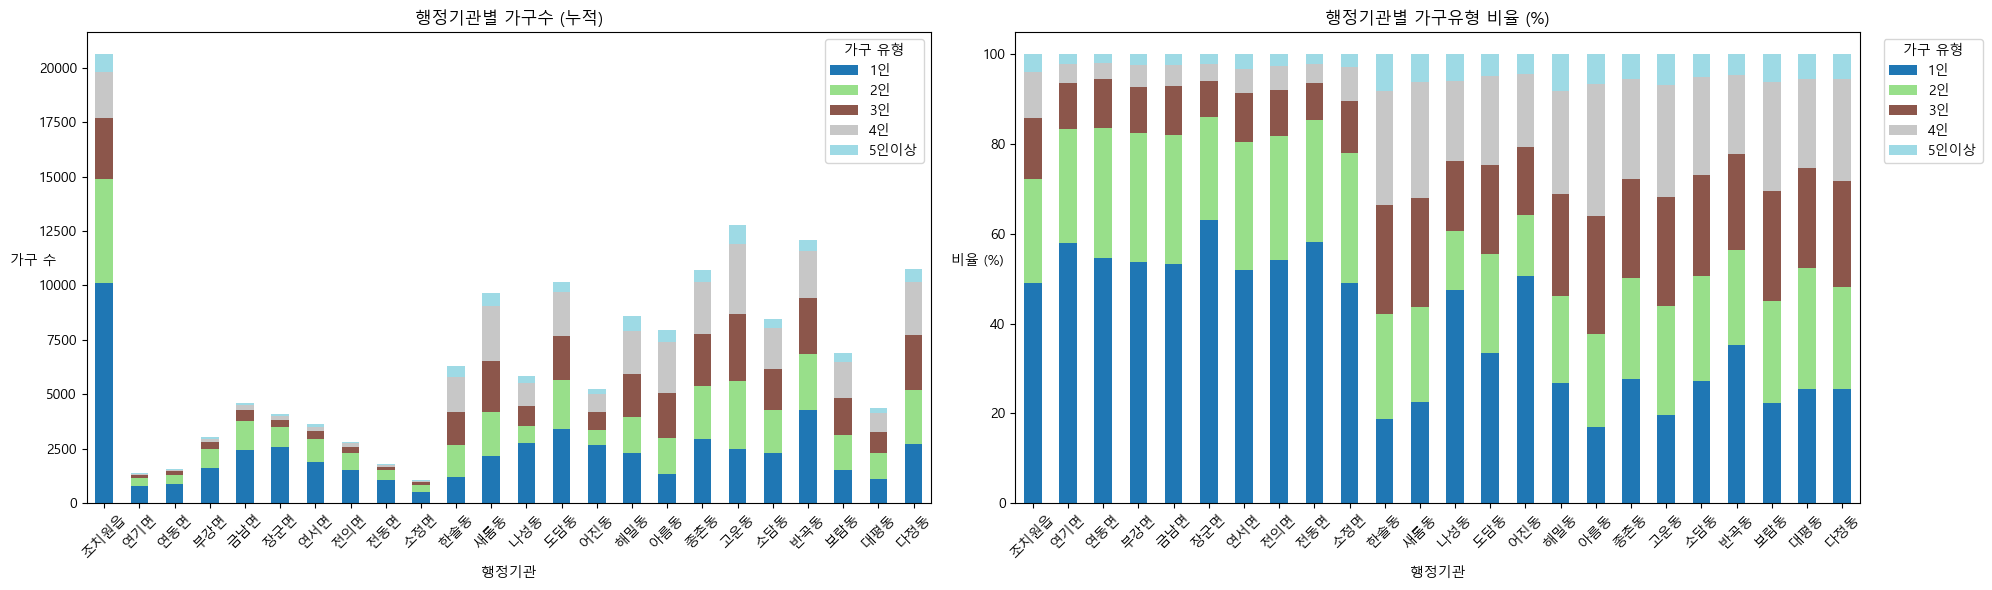

In [31]:
import matplotlib.pyplot as plt

df_plot = df_people_new.set_index('행정기관')

# 비율 계산
df_ratio = df_plot.div(df_plot.sum(axis=1), axis=0) * 100

# subplot 1행 2열
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

# (1) 절대값 누적 그래프
df_plot.plot(kind='bar', stacked=True, ax=axes[0], colormap='tab20')
axes[0].set_title('행정기관별 가구수 (누적)')
axes[0].set_ylabel('가구 수', rotation=0)
axes[0].set_xlabel('행정기관')
axes[0].legend(title='가구 유형')
axes[0].tick_params(axis='x', rotation=45)

# (2) 비율 누적 그래프
df_ratio.plot(kind='bar', stacked=True, ax=axes[1], colormap='tab20')
axes[1].set_title('행정기관별 가구유형 비율 (%)')
axes[1].set_ylabel('비율 (%)', rotation=0)
axes[1].set_xlabel('행정기관')
axes[1].legend(title='가구 유형', bbox_to_anchor=(1.02, 1), loc='upper left')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


* 각 가구 유형 별 세대 수 많은 5개의 행정기관

In [32]:
df_side = pd.concat(
    [df_people_new.nlargest(5, col)[['행정기관', col]].reset_index(drop=True) 
     for col in ['1인','2인','3인','4인','5인이상']], 
    axis=1
)
df_side

,행정기관,1인,행정기관,2인,행정기관,3인,행정기관,4인,행정기관,5인이상
0,조치원읍,10104,조치원읍,4790,고운동,3099,고운동,3194,고운동,873
1,반곡동,4269,고운동,3098,조치원읍,2785,새롬동,2499,조치원읍,813
2,도담동,3408,반곡동,2569,반곡동,2567,다정동,2459,해밀동,701
3,종촌동,2965,다정동,2459,다정동,2530,종촌동,2388,새롬동,590
4,나성동,2779,종촌동,2429,종촌동,2355,아름동,2331,종촌동,589


#### 2.2.2 이상치

* 이상치 검출

* 이상치 존재 하지 않아 생략

* 이상치 분석
    * total_bill: 평균에서 크게 벗어난 고액 결제(약 4건).
    * tip: 매우 높은 팁을 준 경우(약 3건).
    * size: 평균보다 인원 수가 큰 테이블(약 4건).
* 이상치 처리 방안
    * 아래 사항은 아웃라이어로 분류되지만 고객 특이 케이스로 해석하는 것이 더 적절해 보이므로 데이터 유지결정

### 3. 초기데이터 분석

#### 3.1 기초통계 정보 확인 (최대값, 최소값, 평균값, 표준편차, 최빈값, 유일값 등)

#### 3.2 수치형 데이터 분포 확인

#### 3.3  범주형 데이터 확인

* 인면전 가맹점 데이터

In [167]:
df_clean.읍면동.value_counts()

읍면동
조치원읍    2027
나성동     1331
보람동      846
고운동      769
새롬동      656
아름동      646
도담동      597
어진동      596
소담동      516
종촌동      493
다정동      463
금남면      358
대평동      331
반곡동      326
장군면      298
한솔동      270
부강면      224
연서면      212
해밀동      177
전의면      166
집현동      108
산울동       96
연기면       90
소정면       65
전동면       56
연동면       55
가람동       18
합강동        1
세종동        1
Name: count, dtype: int64

In [168]:
df_clean.업종명.value_counts()

업종명
일반음식점       3506
학원/교육       2149
미용/뷰티/위생    1098
슈퍼/마트        804
의류/잡화/안경     776
카페/베이커리      678
병원/약국        644
기타           517
스포츠/헬스       500
부동산/인테리어     278
도서/문화/공연     254
자동차/자전거      227
가전/통신        179
분식            49
산모/육아         42
주유소           36
귀금속           23
숙박/캠핑         20
레저            12
Name: count, dtype: int64

#### 3.4 초기 데이터 분석 정리

# 4. 탐색적연구

#### Step1] 데이터 분석을 위한 목적, 대상 또는 주요 가설을 세워본다. 주요가설 도출후 우선순위를 설정한다.

* 가설1] 고액 결제는 주로 저녁 시간에 발생할 것이다.
* 가설2] 인원수가 높을 수록 고액 결제를 할 것이다.
* 가설3] 흡연자일 수록 고액 결제를 할 것이다.

#### Step2] 가설증명: 데이터 재 구조화, 시각화를 통해 새로운 insight 및 정보를 습득 및 가설을 검증한다.

* 인사이트
    * 고가의 팁과 총금액은 저녁 타임에서 발생된다.
    * 총금액과 팁은 양의 상관관계를 보여주고 있다.

* 가설2] 인원수가 높을 수록 고액 결제를 할 것이다.

* 인사이트
    * 전체적으로 인원수에 따라 고액 결재를 많이 하나따라 고액 결재를 많이 하나 예외도 존재한다. (최고가, 최고팁은 3인석에서 발견됨)

* 가설3] 흡연자일 수록 고액 결제를 할 것이다.

* 인사이트
    * 흡연자와 총결제금액, tip과의 상관관계가 뚜렷히 드러나지 않는다.

#### Step3] 탐색적연구 반복
* 추가 가설 설정 하고 가설의 우선순위를 재조정한다.
* 시간 일정이 허락하는 범위내에서 Step1~Step3를 반복한다.

* 추가 가설 리스트
    * 추가 가설1] 요일별 시간대별 매출 상관관계가 존재 할 것으로 보임
    * 추가 가설2] 성별에 따른 매출 상관관계가 존재 할 것으로 보임

* 추가 가설1] 요일별 시간대별 매출 상관관계가 존재 할 것으로 보임

* 인사이트
    * 토요일 저녁시간에 고가의 팁이 발생한다.
    * 주말(토요일, 일요일)에는 외식을 거의 저녁에 한다.
    * 목요일 점심에 총금액 12$ 부근에 응집도가 높다.
    * 목요일은 거의 점심식사를 한다.
    * 금요일은 점심, 저녁식사를 모두 한다.
    * 일요일 저녁에 적은 값에도 큰 팁을 내는 특이한 데이터가 존재한다.

* 추가 가설2] 성별에 따른 매출 상관관계가 존재 할 것으로 보임

* 인사이트
    * 최고 매출은 남성 그룹에서 발생되었다.
    * 팁이 높은 비율과 낮은 비율로 보이는 아웃라이어도 남성 그룹에서 발견되었다.

#### Step4] 최종결론: 지금까지 진행했던 모든 탐색적연구의 결과를 반영하여 최종 결론을 내린다.

#### 인사이트 정리

* 기초 분석
    * total_bill: 주로 $10~20, 고액 일부로 인해 오른쪽 꼬리(long tail) 분포
    * tip: 평균 $2 부근 집중, 고액 일부 존재
    * size: 2인이 가장 많음 (소규모 그룹 위주)
    * 요일/시간대 분포: 주말(Sat, Sun) & Dinner 데이터가 다수
* 초기 인사이트
    * 소비 패턴
        * 주말 저녁에 결제가 집중됨
        * 대부분 2인 중심의 식사
        * 팁과 총액은 일부 고액으로 인해 편향된 분포를 보임
    * 이상치(아웃라이어)
        * 실제 의미 있는 고객군으로 판단
* 가설 검증
    * 가설1] 고액 결제는 주로 저녁 시간에 발생할 것이다.
        * 고가의 팁과 총금액은 저녁 타임에서 발생된다.
        * 총금액과 팁은 양의 상관관계를 보여주고 있다.
    * 가설2] 인원수가 높을 수록 고액 결제를 할 것이다.
        * 전체적으로 인원수에 따라 고액 결재를 많이 하나따라 고액 결재를 많이 하나 예외도 존재한다. (최고가, 최고팁은 3인석에서 발견됨)
    * 가설3] 흡연자일 수록 고액 결제를 할 것이다.
        * 흡연자와 총결제금액, tip과의 상관관계가 뚜렷히 드러나지 않는다.
    * 추가 가설1] 요일별 시간대별 매출 상관관계가 존재 할 것으로 보임
    * 추가 가설2] 성별에 따른 매출 상관관계가 존재 할 것으로 보임


---

# 인사이트별 비지니스 전략

* 기초 분석
    * total_bill: 주로 $10~20, 고액 일부로 인해 오른쪽 꼬리(long tail) 분포  
      => 비즈니스 전략1
    * tip: 평균 $2 부근 집중, 고액 일부 존재
      => 비즈니스 전략2
    * size: 2인이 가장 많음 (소규모 그룹 위주)
    * 요일/시간대 분포: 주말(Sat, Sun) & Dinner 데이터가 다수
* 초기 인사이트
    * 소비 패턴
        * 주말 저녁에 결제가 집중됨
        * 대부분 2인 중심의 식사
        * 팁과 총액은 일부 고액으로 인해 편향된 분포를 보임
    * 이상치(아웃라이어)
        * 실제 의미 있는 고객군으로 판단
* 가설 검증
    * 가설1] 고액 결제는 주로 저녁 시간에 발생할 것이다.
        * 고가의 팁과 총금액은 저녁 타임에서 발생된다.
        * 총금액과 팁은 양의 상관관계를 보여주고 있다.
    * 가설2] 인원수가 높을 수록 고액 결제를 할 것이다.
        * 전체적으로 인원수에 따라 고액 결재를 많이 하나따라 고액 결재를 많이 하나 예외도 존재한다. (최고가, 최고팁은 3인석에서 발견됨)
    * 가설3] 흡연자일 수록 고액 결제를 할 것이다.
        * 흡연자와 총결제금액, tip과의 상관관계가 뚜렷히 드러나지 않는다.
    * 추가 가설1] 요일별 시간대별 매출 상관관계가 존재 할 것으로 보임
    * 추가 가설2] 성별에 따른 매출 상관관계가 존재 할 것으로 보임


---

# 최종 결론

* 요약정보 또는 비즈니스 전략 위주로 정리